# Sales Prediction based on Social Media Ads

## HImanshu Sharma (DSOCT03)

## Introduction
> Using the fictional dataset of Gender, Age, Salary, Purchased (Target variable), the company wants to know whether a customer will buy its product or not.

## Approach - Supervised Machine Learning (Classification)

### Supervised Machine Learning:

- The algorithms which learns from labeled data. After learning from the the data, the algorithm determines which label should be given to new data by their associating patterns to the unlabeled new data.

- It can be divided into two categories: classification and regression. 

### Classification:

- Classification is a technique which is useful to determining the class based on one or more independent variables.

- I am going through the following classification algorithms in this notebook:

> k-nearest neighbors

> Logistic Regression

> Decision Tree

> Random Forest

>Naive Bayes

## Steps
- Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing our wrangled data
- Making Report on
    - Aboout data wrangling efforts and
    - About data analyses and visualizations

In [1]:
#import Useful Library
import pandas as pd
import numpy as np

#for making graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

## 1. Perform Basic EDA
### a. Boxplot

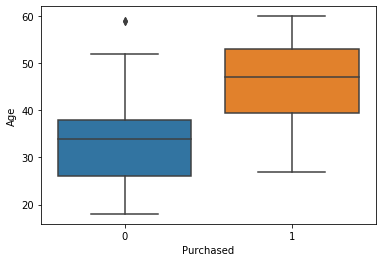

In [6]:
sns.boxplot(y='Age', x='Purchased', data=df)

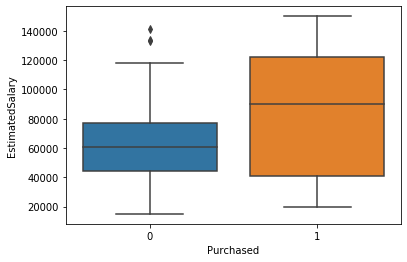

In [7]:
sns.boxplot(y='EstimatedSalary', x='Purchased', data=df)

### b. Histogram – Distribution of Target Variable

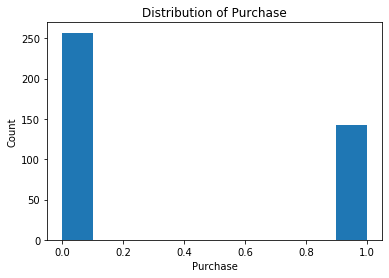

In [8]:
plt.hist(x="Purchased", data=df);
plt.title('Distribution of Purchase');
plt.ylabel('Count');
plt.xlabel('Purchase');

- By this histogram we have clear idea that by the social media ads most of the are not purchased the product. In this notebook We will deep dive into the data and try to find the reason and explore it further. 

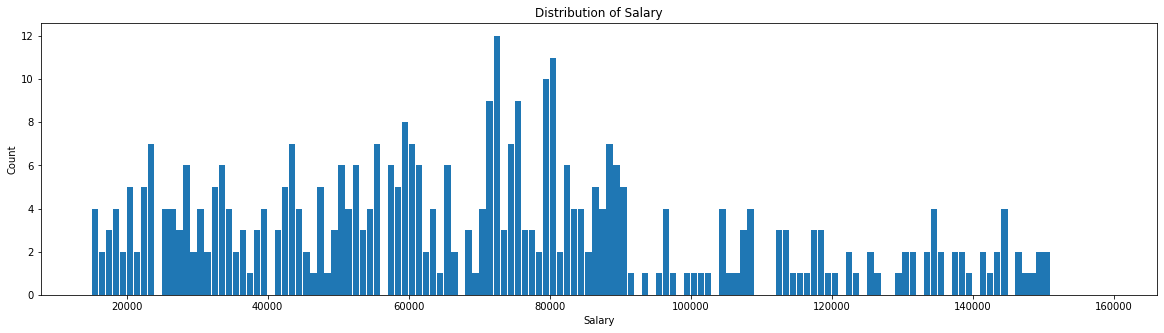

In [9]:
plt.figure(figsize=(20,5))
bins_size = np.arange(15000,150000+10000,1000)
plt.hist(x="EstimatedSalary", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Salary');
plt.ylabel('Count');
plt.xlabel('Salary');

- The chart is better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable frequency with their Annual Income ranging from approx 75k US Dollars and 80K US Dollars. The average salary of the customers is 69742.5.

In [10]:
df.EstimatedSalary.mean()

69742.5

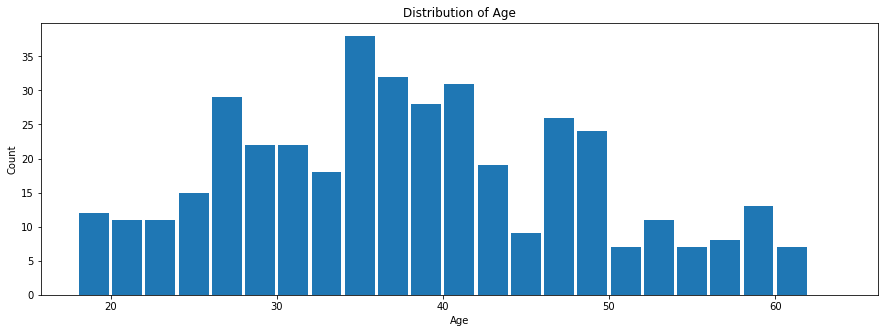

In [11]:
plt.figure(figsize=(15,5))
bins_size = np.arange(18,65,2)
plt.hist(x="Age", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Age');
plt.ylabel('Count');
plt.xlabel('Age');

- By looking at the above graph-, It can be seen that the Ages from 27 to 42 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison of youngsters.

### c. Distribution Plot – Target Variable

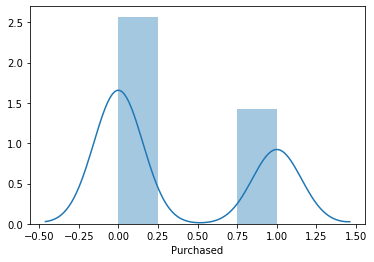

In [12]:
sns.distplot(df.Purchased);

### d. Aggregation for all numerical Columns

In [13]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### e. Unique Values across all columns

In [14]:
df.Age.unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

In [15]:
df.Age.nunique()

43

In [16]:
df.EstimatedSalary.unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

In [17]:
df.EstimatedSalary.nunique()

117

In [18]:
df.Purchased.unique()

array([0, 1], dtype=int64)

### f. Duplicate values across all columns

In [19]:
df.duplicated().sum()

0

### g. Correlation – Heatmap

(4.0, 0)

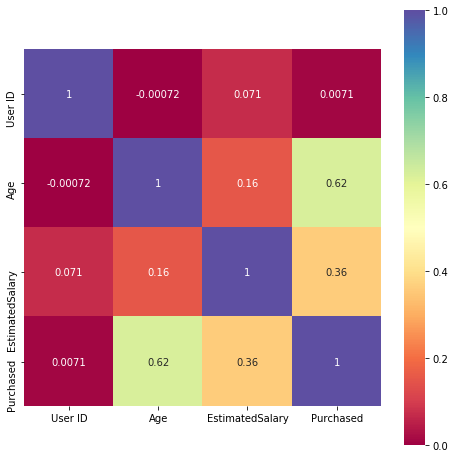

In [20]:
plt.figure(figsize =(8,8))
ax= sns.heatmap(df.corr(),square = True, annot = True,cmap= 'Spectral' )
ax.set_ylim(4.0, 0)

- The Above Graph for Showing the linear correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Blue Color and least correlated features with Red color.We can clearly see that only age has linearly related to the purchased. 

### h. Regression Plot

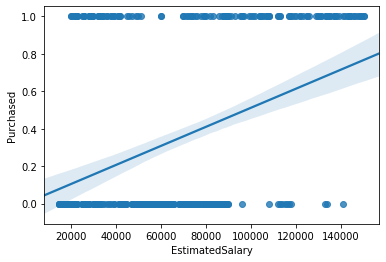

In [21]:
ax = sns.regplot(x="EstimatedSalary", y="Purchased", data=df)

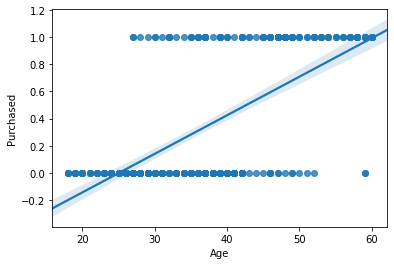

In [22]:
ax = sns.regplot(x="Age", y="Purchased", data=df)

### i. Bar Plot

In [23]:
col = sns.color_palette()[0]

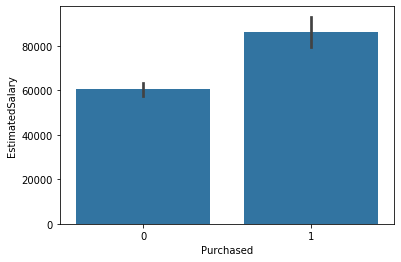

In [24]:
sns.barplot(x="Purchased", y="EstimatedSalary", data=df, color=col)

- By this bar plot we can take the idea that the person who purchased the product have more salary then the average.

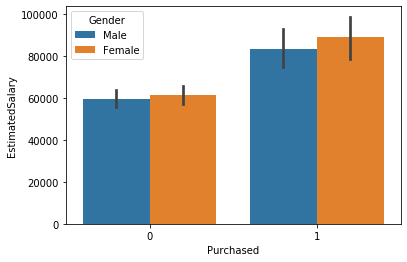

In [25]:
sns.barplot(x="Purchased", y="EstimatedSalary",hue='Gender', data=df)

- females have higher average salary.
- females purchased more

### j. Pair plot

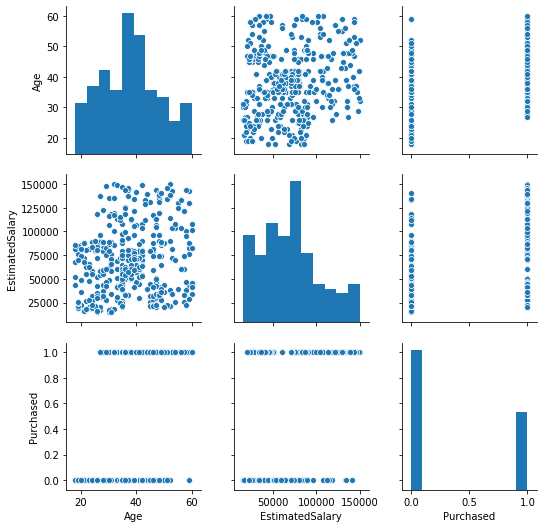

In [26]:
sns.pairplot(df, vars=["Age", "EstimatedSalary","Purchased"])

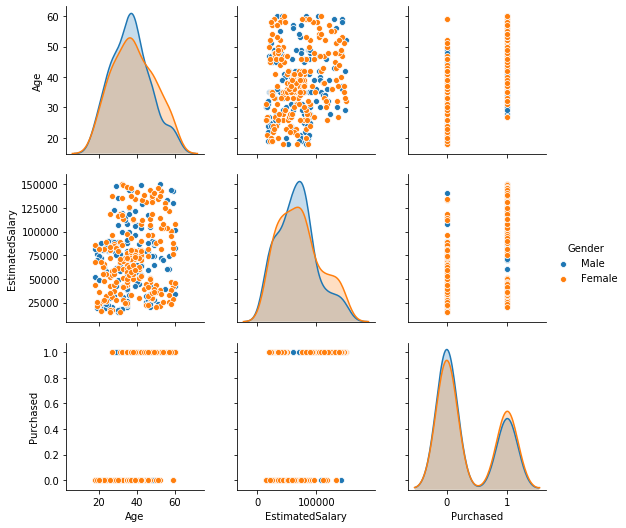

In [27]:
sns.pairplot(df, vars=["Age", "EstimatedSalary","Purchased"], hue = "Gender")

## 2. Drop all duplicate rows

In [28]:
df.drop_duplicates(inplace=True)

## 3. Drop all non-essential features

In [29]:
df.drop(columns=['User ID'], inplace = True)

## 4. Replace outliers with Nulls (if you find it essential) and replace all the nulls with respective approach of central tendencies (Mean/Median/Mode).

In [30]:
df.loc[((df.Age >58) & (df.Purchased==0)), 'Age'] = np.nan
df.fillna(53,inplace=True)

In [31]:
df.loc[(df.EstimatedSalary>120000) & (df.Purchased==0), 'EstimatedSalary'] = np.nan
df.fillna(120000,inplace=True)

## 5. Calculate Z score to validate whether outliers are still present or not.

In [32]:
from scipy import stats
z = np.abs(stats.zscore(df['EstimatedSalary']))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [33]:
z = np.abs(stats.zscore(df['Age']))
print(np.where(z > 3))

(array([], dtype=int64),)


## 6. Clean the data with formatting issues if any. (converting datatypes, replacing dollars, etc.)

In [34]:
df.Age = df.Age.astype("int64")

In [35]:
df.EstimatedSalary = df.EstimatedSalary.astype("int64")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


## 7. Add your view of EDA to enhance understanding of data. i.e., Grouping data and observing the way data is distributed. Try to add as many layers of EDA as possible.

In [37]:
a = df.groupby(['Gender', 'Age'])
a.first()

EstimatedSalary  Purchased
Gender Age                            
Female 18             44000          0
       19             21000          0
       20             23000          0
       21             16000          0
       22             63000          0
...                     ...        ...
Male   56            133000          1
       57             74000          1
       58            144000          1
       59            143000          1
       60            102000          1

[83 rows x 2 columns]

In [38]:
a = df.groupby(['Purchased','EstimatedSalary'])
a.first()

Gender  Age
Purchased EstimatedSalary             
0         15000              Male   30
          16000            Female   21
          17000            Female   27
          18000              Male   32
          19000              Male   19
...                           ...  ...
1         146000           Female   51
          147000           Female   35
          148000             Male   29
          149000           Female   33
          150000           Female   32

[164 rows x 2 columns]

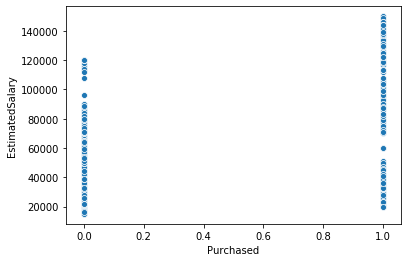

In [39]:
sns.scatterplot(y="EstimatedSalary", x="Purchased", data=df)

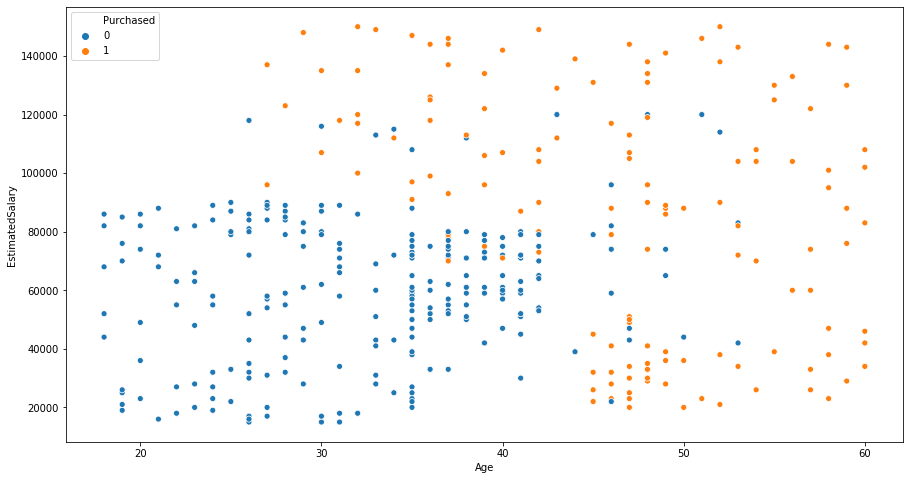

In [40]:
plt.figure(figsize = (15,8))
sns.scatterplot(y="EstimatedSalary", x="Age", data=df, hue = 'Purchased')

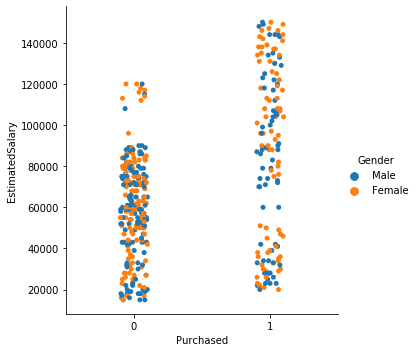

In [41]:
sns.catplot(y="EstimatedSalary", x="Purchased", data=df, hue = 'Gender')

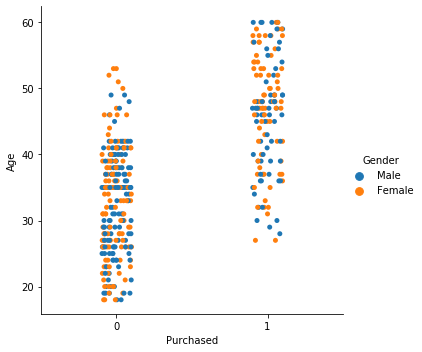

In [42]:
sns.catplot(y="Age", x="Purchased", data=df, hue = 'Gender')

## 8. Build a model of choice – Classification problem statement, hence build a classification model first and calculate Confusion Matrix, AUC, F1 Score, Precision, Recall and Accuracy.

In [43]:
df.Gender.replace({'Male':1,
                   'Female':0}, inplace=True)

In [44]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


## Standardize the Variables
- Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [45]:
X = df.iloc[:, [1, 2]]
y = df.iloc[:, 3]

In [46]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


## KNN

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Using KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

### Predictions and Evaluations

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[61  7]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        68
           1       0.81      0.94      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.92      0.90       100
weighted avg       0.92      0.91      0.91       100



### Choosing a K Value

In [51]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

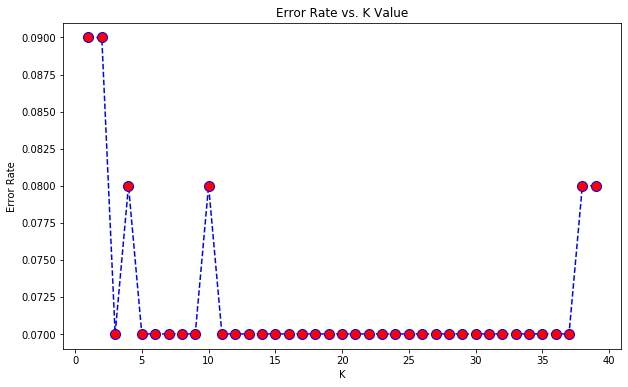

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>4 the error rate is decreasing and if we take those values that maked overfitting so we take k = 4. So Let's retrain the model with that and check the classification report!

In [53]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=4


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [54]:
from sklearn.metrics import accuracy_score
print ('accuracy_score : ', accuracy_score(y_test,knn_pred))

accuracy_score :  0.92


## K fold Cross Validation

> This technique is useful to evaluate bias and variance more accurately. It splits the training set into k groups, and in each iteration, the algorithm chooses different test fold (individual section) for testing. This allows every part of the training set to be used for testing.

In [55]:
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn,X,y, cv = 5)

In [56]:
knn_accuracy

array([0.81481481, 0.88888889, 0.725     , 0.74683544, 0.69620253])

In [57]:
knn_accuracy.mean()

0.7743483356774497

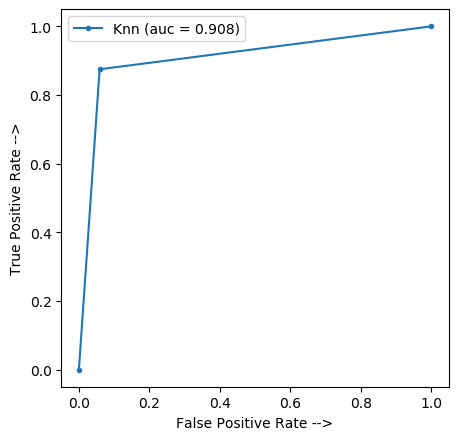

In [58]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_pred)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='Knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## 9. Build at least a minimum of 4 different Classification models. All the models should use K-Fold cross Validation to train the model with at least 5-fold cross validation.

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

In [60]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[65  3]
 [ 8 24]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## K- Fold CV

In [61]:
log_accuracy = cross_val_score(log_reg,X,y, cv = 5)
print(log_accuracy)
print("mean value of accuracy",log_accuracy.mean())

[0.64197531 0.64197531 0.6375     0.64556962 0.72151899]
mean value of accuracy 0.6577078449757774


## SVM

In [62]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

In [63]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## K- Fold CV

In [64]:
svc_accuracy = cross_val_score(svc_classifier,X,y, cv = 5)
print(svc_accuracy)
print("mean value of accuracy",svc_accuracy.mean())

[0.69135802 0.65432099 0.6875     0.65822785 0.70886076]
mean value of accuracy 0.6800535239881231


## Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [66]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[62  6]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



## K- Fold CV

In [67]:
dt_accuracy = cross_val_score(dt_classifier,X,y, cv = 5)
print(dt_accuracy)
print("mean value of accuracy",dt_accuracy.mean())

[0.75308642 0.92592593 0.875      0.74683544 0.74683544]
mean value of accuracy 0.8095366463509922


## Random Forest Classification

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [69]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[63  5]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



## K- Fold CV

In [70]:
rf_accuracy = cross_val_score(rf_classifier,X,y, cv = 5)
print(rf_accuracy)
print("mean value of accuracy",rf_accuracy.mean())

[0.85185185 0.95061728 0.8875     0.7721519  0.83544304]
mean value of accuracy 0.8595128145022659


## 10. Compare the error and pick the ideal one with least errors.

> By seeing the confusion matrix and accuracy score `Random Forest classifier` perform batter than others.

In [71]:
print("For Random Forest Classifier::")
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

For Random Forest Classifier::
[[63  5]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



## 11. Run hyperparameter tuning on all the models and pick the best parameters (A minimum of 2 Parameters should be tuned) and picked.

## SVM

In [72]:
#Applying grid search
from sklearn.model_selection import GridSearchCV
parameters = [{"C": [1, 10, 100, 1000], "kernel": ['linear']}, 
              {"C": [1, 10, 100, 1000], "kernel": ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001]}]

#Use this list to train
grid_search = GridSearchCV(estimator = svc_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

#Use attributes of grid_search to get the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best accuracy: ",best_accuracy)
print(best_parameters)

Best accuracy:  0.9
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, C =10, gamma=0.1)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

In [74]:
print("For SVM Classifier::")
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

For SVM Classifier::
[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



## Random Forest Classification

In [76]:
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15]
min_samples_leaf = [1, 2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_classifier, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   15.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [77]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
bestF.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth=5,min_samples_leaf=1)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [80]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## Decision Tree Classifier

In [81]:
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]

parameters = dict(criterion=criterion,max_depth=max_depth)

  
clf = GridSearchCV(rf_classifier, hyperF, cv = 5, verbose = 1, n_jobs = -1)

# Fit the grid search
clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   14.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_de

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [83]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[65  3]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.91      0.91      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



## Logistic Regression

In [84]:
param_grid = [    
    {'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


In [85]:
a = best_clf.best_estimator_
a

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
best_clf.best_params_

{'max_iter': 100, 'solver': 'lbfgs'}

In [87]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0, solver='lbfgs',max_iter=100 )
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

In [88]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[65  3]
 [ 8 24]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



## KNN

In [89]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10, verbose=True, n_jobs=-1)
#Fit the model
best_model = clf.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    3.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [90]:
best_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [91]:
best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 9, 'p': 1}

In [93]:
knn = KNeighborsClassifier(n_neighbors=9, p = 1, leaf_size=1)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## 12. Now, compare the models and pick the ideal one.

### By the hyperparameter tuning `Decision Tree` prefome best in above model 

In [94]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[65  3]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.91      0.91      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



## 13. Try to Predict the target with maximum independent features.

In [95]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [96]:
X1 = df.iloc[:,0: 3]
y1 = df.iloc[:, 3]

In [97]:
X1

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

## Decision Tree

In [99]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [100]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[73  6]
 [ 4 37]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

